# Парная линейная регрессия

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных (берём колонку '0' и используем index_col=0)
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [ ]:
class Model(object):
    def __init__(self, b0=1.0, b1=2.0):
        self.b0 = b0
        self.b1 = b1
        self.threshold = 1e-6
    
    def _to_series(self, data):
        if isinstance(data, pd.DataFrame):
            return data.iloc[:, 0]
        return data
    
    def predict(self, X):
        X = self._to_series(X)
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        X = self._to_series(X)
        Y = self._to_series(Y)
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y, alpha=0.001, max_steps=5000, autobreak=False):
        X = self._to_series(X)
        Y = self._to_series(Y)
        steps = []
        errors = []
        for step in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            steps.append(step + 1)
            errors.append(new_err)
            if len(errors) >= 2 and autobreak:
                difference = abs(errors[-1] - errors[-2])
                if difference < self.threshold:
                    break
        return steps, errors

1.0
201.0
initial error: 2779.7235840959734
error after gradient descent: 2.0059226588479424e-25


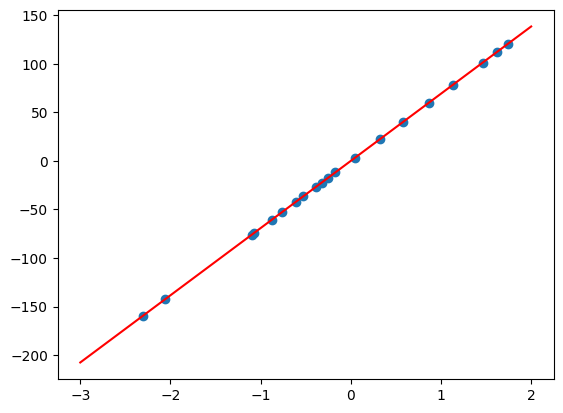

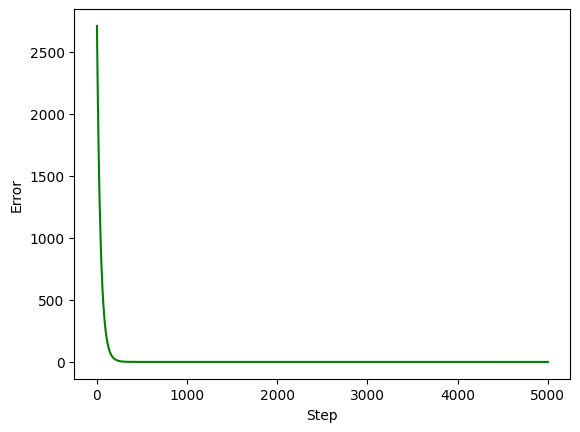

In [53]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
print('initial error:', hyp.error(x, y))

steps, errors = hyp.fit(x, y, alpha=0.01, max_steps=5000)
print('error after gradient descent:', hyp.error(x, y))

# Линия регрессии
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# График обучения
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Step')
plt.ylabel('Error')
plt.show()

# EXTRA TASKS

# 1

In [54]:
import random
x_, y_ = random.sample(range(-100, 101), 100), random.sample(range(-100, 101), 100)
for i in range(len(x_)):
    model = Model(b0=x_[i], b1=y_[i])
    steps, errors = model.fit(x, y, alpha=0.01, max_steps=500)
    assert errors[-1] < 1, f"Model did not converge for b0={x_[i]}, b1={y_[i]}"
    print('.', end='')


....................................................................................................

# 2

initial error: 2779.7235840959734
error after gradient descent: 3.01670889926168e+300


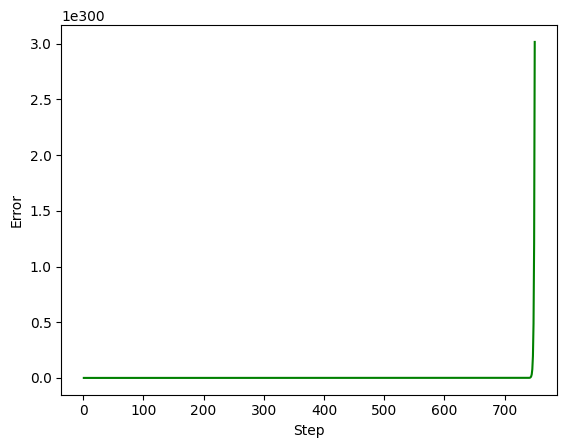

In [55]:
hyp = Model()
print('initial error:', hyp.error(x, y))

steps, errors = hyp.fit(x, y, alpha=2, max_steps=750)
print('error after gradient descent:', hyp.error(x, y))

plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Step')
plt.ylabel('Error')
plt.show()

# 3

In [56]:
model = Model()
xdf = x.to_frame()
ydf = y.to_frame()
assert type(xdf) == pd.DataFrame and type(ydf) == pd.DataFrame, "Input data should be pandas DataFrames"
steps, errors = model.fit(xdf, ydf, alpha=0.01, max_steps=500)
print(errors[-1])


0.03365495647036475


# 4

In [58]:
model = Model()
steps, errors = model.fit(x, y, alpha=0.01, max_steps=5000, autobreak=True)
print('error after gradient descent:', model.error(x, y))
print(len(steps))

error after gradient descent: 5.150253159447793e-05
835


# 5

In [ ]:
# yes

# 6